In [19]:

import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))

from reservoirgrid.models import Reservoir
from reservoirgrid.helpers import chaos_utils, utils, viz, reservoir_tests
from matplotlib.colors import LogNorm, Normalize

import gc
import tracemalloc
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import seaborn as sns


In [16]:
path = "../../Examples/Input_Discretization/results/Chaotic/"
save_path = "../../Examples/Input_Discretization/Plots/SingleMetric/"
system_name = "Rossler"
system_path = os.path.join(path, system_name)

In [27]:
ppp = "/10.0" + ".pkl"
selected_system = path + system_name + ppp
with open(selected_system, "rb") as f:
    data = pickle.load(f)

leaky_rates = []
lyap_times = []
for i in range(len(data)):
    if data[i]["parameters"]["InputScaling"] == 1.0 and data[i]["parameters"]["SpectralRadius"] == 1.0:
        
        leaky = data[i]['parameters']['LeakyRate']
        lyap_time = chaos_utils.comparative_lyapunov_time(
            test_targets = data[i]["true_value"],
            predictions = data[i]["predictions"]
        )
        print(data[i]['parameters'])
        leaky_rates.append(leaky)
        lyap_times.append(lyap_time)

{'SpectralRadius': 1.0, 'LeakyRate': 0.1, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.3, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.5, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.7, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.9, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.95, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.1, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.3, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.5, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.7, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.9, 'InputScaling': 1.0}
{'SpectralRadius': 1.0, 'LeakyRate': 0.95, 'InputScaling': 1.0}


In [29]:
leaky_rates, lyap_times

([0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95],
 [0, 2, 1, 3, 13, 1, 2, 2, 2, 0, 3, 3])

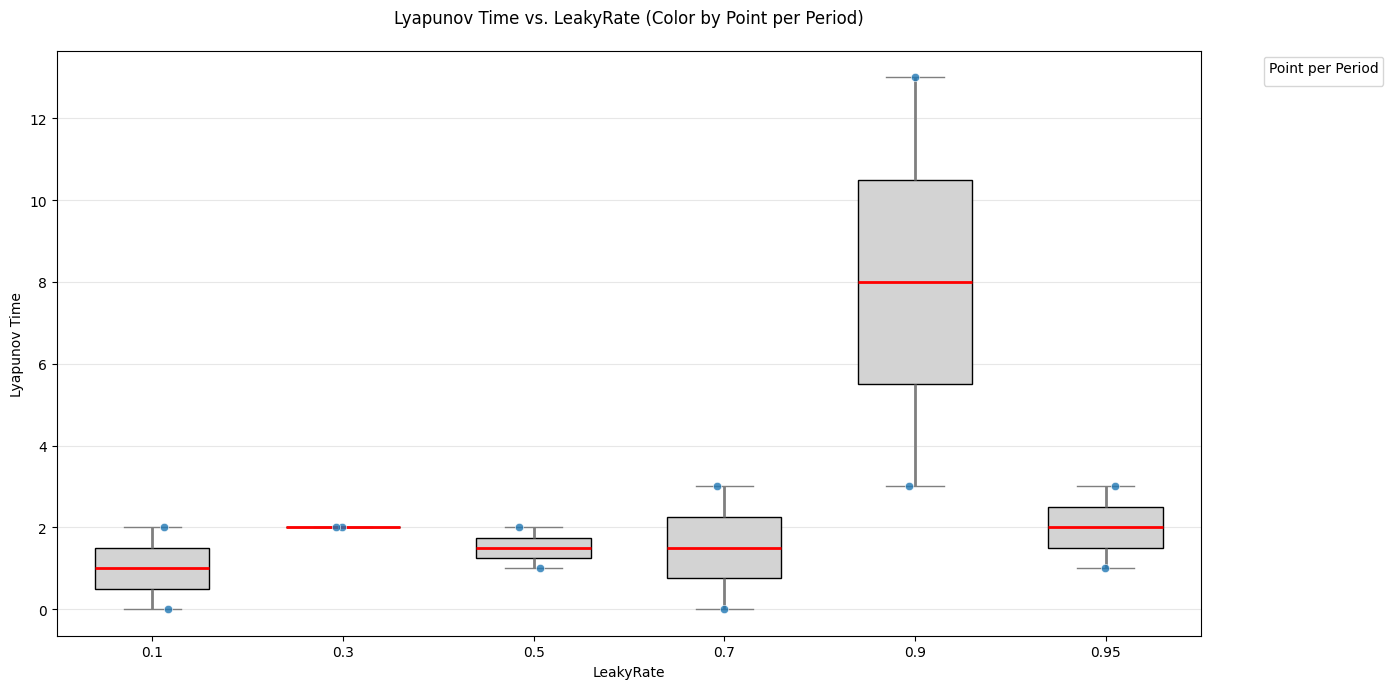

In [26]:
# Create DataFrame with File information
df1 = pd.DataFrame({
    'LyapunovTime': lyap_times,
    'LeakyRate': leaky_rates,
})

plt.figure(figsize=(14, 7))

# 1. Boxplot (grouped by LeakyRate)
sns.boxplot(
    data=df1,
    x='LeakyRate',
    y='LyapunovTime',
    color='lightgray',
    width=0.6,
    showfliers=False,
    whiskerprops={'linewidth': 2},
    boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'},
    medianprops={'color': 'red', 'linewidth': 2}
)

# 2. Stripplot (color by File)
stripplot = sns.stripplot(
    data=df1,
    x='LeakyRate',
    y='LyapunovTime',
    #palette='tab20',     # Use qualitative palette for distinct files
    #palette="Set2",
    jitter=True,
    size=6,
    alpha=0.8,
    linewidth=0.5,
    edgecolor='white',
    dodge=False         # Important for alignment with boxplot
)


plt.title('Lyapunov Time vs. LeakyRate (Color by Point per Period)', pad=20)
plt.xlabel('LeakyRate')
plt.ylabel('Lyapunov Time')
plt.grid(axis='y', alpha=0.3)

# Improve legend
handles, labels = stripplot.get_legend_handles_labels()
plt.legend(
    handles, 
    labels,
    title='Point per Period',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)

# Rotate x-axis labels if many LeakyRate bins
if len(df1['LeakyRate'].unique()) > 10:
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
all_leaky = []
all_lyap = []
file_labels = []

all_files = os.listdir(system_path)
files_to_plot = all_files[:]  

for i, file in enumerate(files_to_plot):
    file_path = os.path.join(system_path, file)
    
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    
    # Initialize arrays for this file
    leaky_rates = []
    lyap_times = []
    
    for entry in data:
        try:
            leaky = entry['parameters']['LeakyRate']
            lyap_time = chaos_utils.comparative_lyapunov_time(
                        test_targets=entry['true_value'],
                        predictions=entry["predictions"]
            )
            leaky_rates.append(leaky)
            lyap_times.append(lyap_time)
        except Exception as e:
            print(f"Error processing entry in {file}: {e}")
            continue

    all_leaky.extend(leaky_rates)
    all_lyap.extend(lyap_times)
    file_labels.extend([file]*len(leaky_rates))

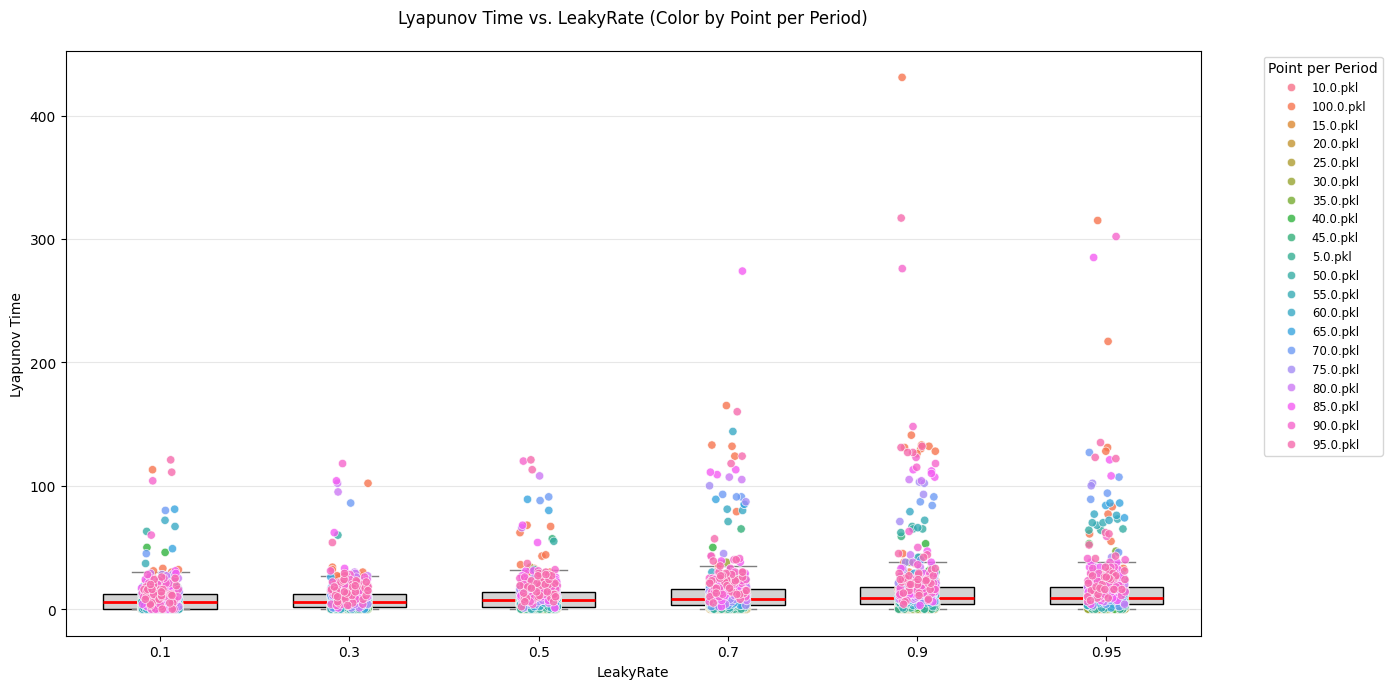

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create DataFrame with File information
df = pd.DataFrame({
    'LyapunovTime': all_lyap,
    'LeakyRate': all_leaky,
    'File': file_labels  # Add file/period information
})

plt.figure(figsize=(14, 7))

# 1. Boxplot (grouped by LeakyRate)
sns.boxplot(
    data=df,
    x='LeakyRate',
    y='LyapunovTime',
    color='lightgray',
    width=0.6,
    showfliers=False,
    whiskerprops={'linewidth': 2},
    boxprops={'facecolor': 'lightgray', 'edgecolor': 'black'},
    medianprops={'color': 'red', 'linewidth': 2}
)

# 2. Stripplot (color by File)
stripplot = sns.stripplot(
    data=df,
    x='LeakyRate',
    y='LyapunovTime',
    hue='File',          # Color points by File instead of LeakyRate
    #palette='tab20',     # Use qualitative palette for distinct files
    palette=sns.color_palette("husl", n_colors=len(df['File'].unique())),
    jitter=True,
    size=6,
    alpha=0.8,
    linewidth=0.5,
    edgecolor='white',
    dodge=False         # Important for alignment with boxplot
)


plt.title('Lyapunov Time vs. LeakyRate (Color by Point per Period)', pad=20)
plt.xlabel('LeakyRate')
plt.ylabel('Lyapunov Time')
plt.grid(axis='y', alpha=0.3)

# Improve legend
handles, labels = stripplot.get_legend_handles_labels()
plt.legend(
    handles, 
    labels,
    title='Point per Period',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)

# Rotate x-axis labels if many LeakyRate bins
if len(df['LeakyRate'].unique()) > 10:
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categori

c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaych\ReservoirGrid\venv\Lib\site-packages\seaborn\categori

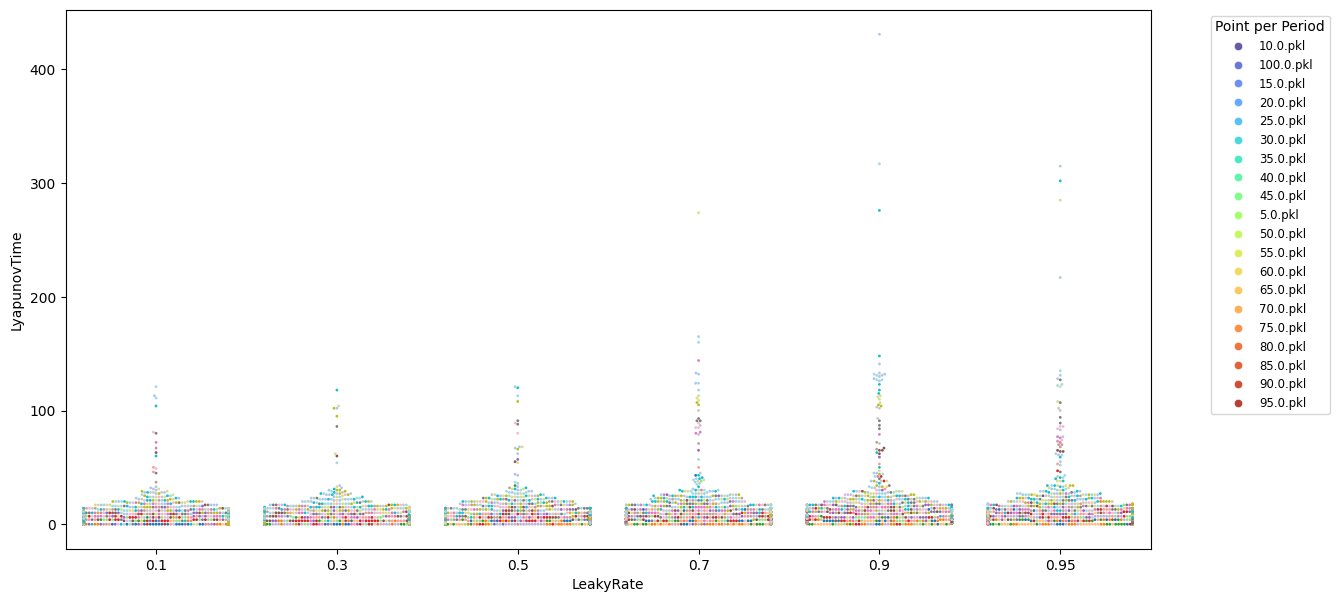

In [5]:
plt.figure(figsize=(14, 7))
sns.swarmplot(
    data=df,
    x='LeakyRate',
    y='LyapunovTime',
    hue='File',
    palette='tab20',
    size=2,
    dodge=False
)

handles, labels = stripplot.get_legend_handles_labels()
plt.legend(
    handles, 
    labels,
    title='Point per Period',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small'
)


## Grid

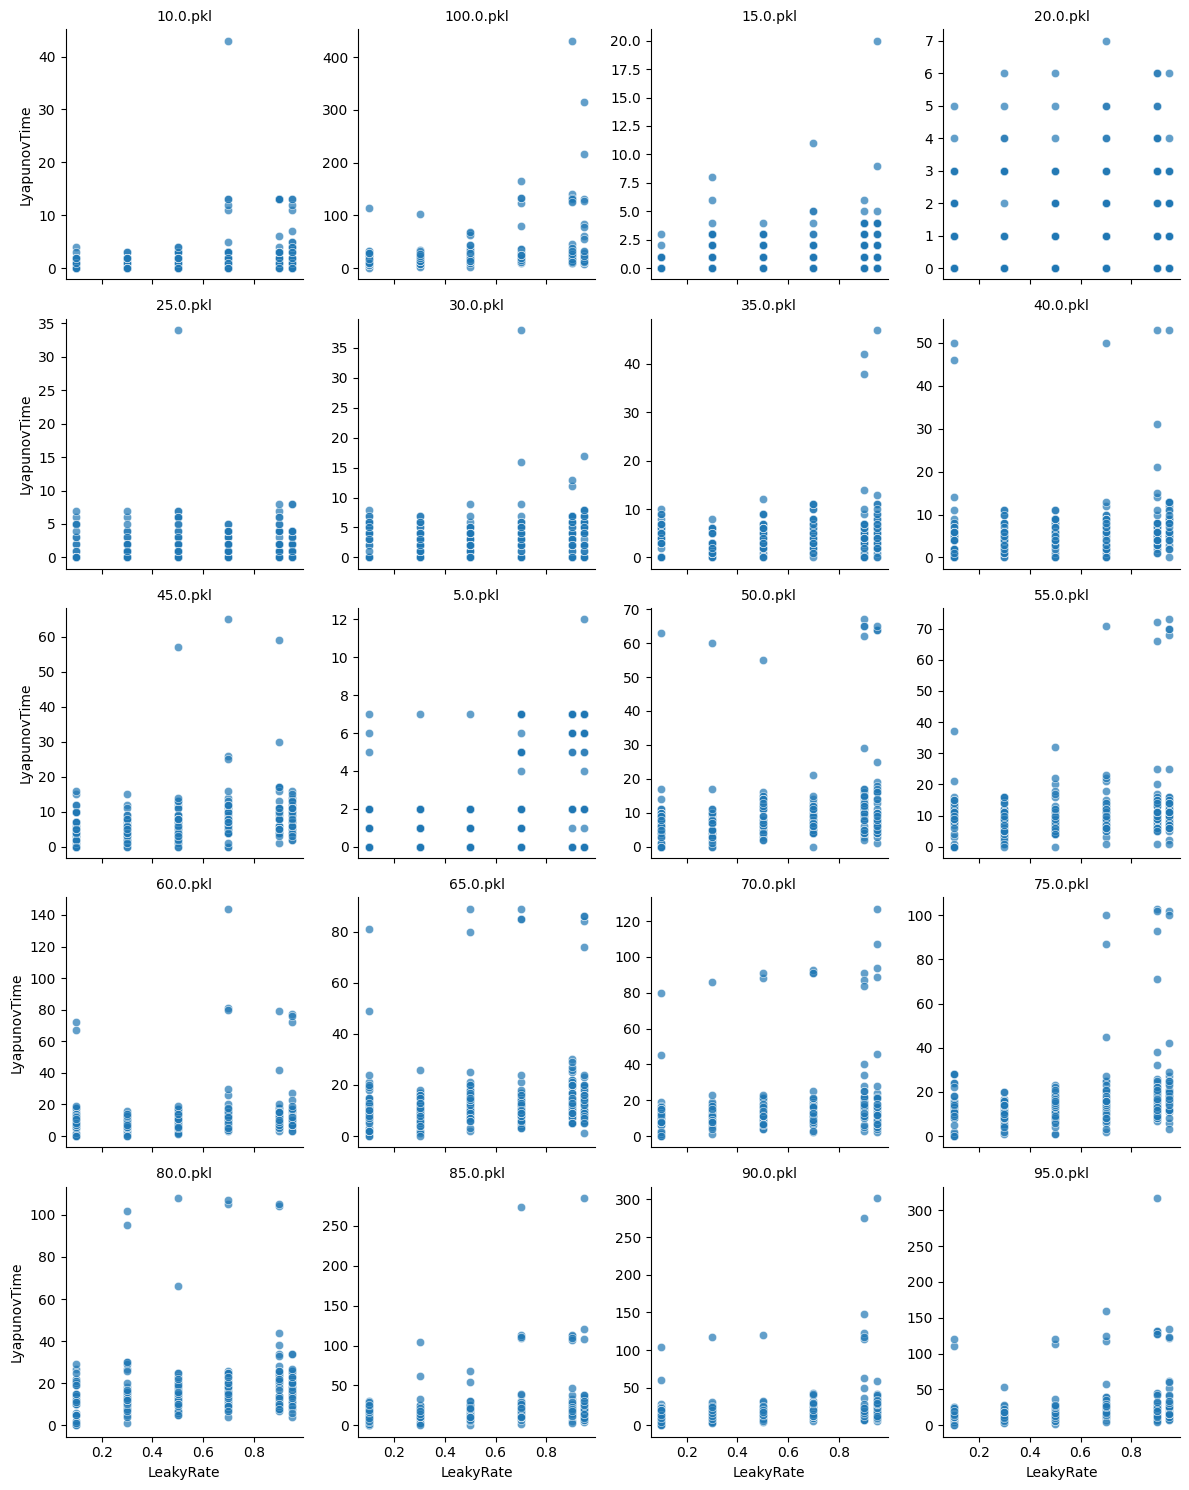

In [6]:
import seaborn as sns
import pandas as pd
# Create DataFrame
df = pd.DataFrame({
    'LeakyRate': all_leaky,
    'LyapunovTime': all_lyap,
    'Dataset': file_labels
})

# Plot
g = sns.FacetGrid(df, col='Dataset', col_wrap=4, height=3, sharey=False)
g.map(sns.scatterplot, 'LeakyRate', 'LyapunovTime', alpha=0.7)
g.set_titles("{col_name}")
plt.tight_layout()

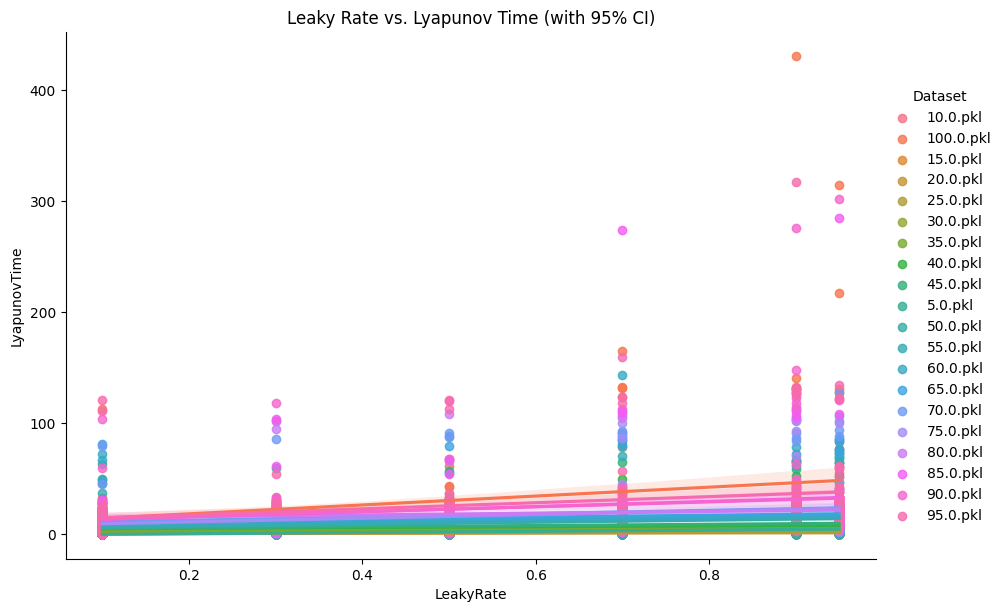

In [7]:
sns.lmplot(data=df, x='LeakyRate', y='LyapunovTime', 
           hue='Dataset', ci=90, height=6, aspect=1.5)
plt.title("Leaky Rate vs. Lyapunov Time (with 95% CI)")
plt.show()